<a href="https://colab.research.google.com/github/SuryARavichan/Chatbot/blob/main/S12_ARIMA_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import random
random.seed(1)

AR: Autoregression. A model that uses the dependent relationship between an observation
and some number of lagged observations.


I: Integrated. The use of differencing of raw observations (i.e. subtracting an observation
from an observation at the previous time step) in order to make the time series stationary.

MA: Moving Average. A model that uses the dependency between an observation and
residual errors from a moving average model applied to lagged observations.

ARIMA (p,d,q)
* p: The number of lag observations included in the model, also called the lag order.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q:The size of the moving average window, also called the order of moving average.

Box - Jenkinss (1970): any TS can be approximated by ARMA (if stationary) or ARIMA (if non-stationary)

* If d =0, ARIMA model can be set as ARMA model
* If d & q =0, ARIMA model can be set as AR model

In [ ]:
def parser(x):
  return pd.datetime.strptime('190'+x,'%Y-%m')

In [ ]:
S=pd.read_csv('/content/drive/My Drive/Time Series/shampoo-sales.csv',header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
S

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

In [ ]:
S.index = S.index.to_period('M')

In [ ]:
S.shape

(36,)

<Axes: xlabel='Month'>

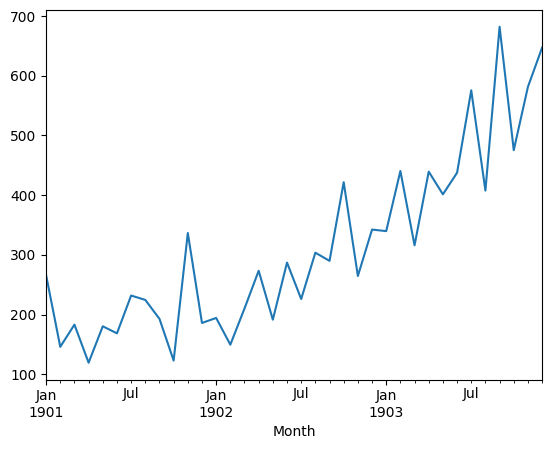

In [ ]:
S.plot() #Clear positive trend indicates, it is not-stationary, a difference of order =1 might required

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

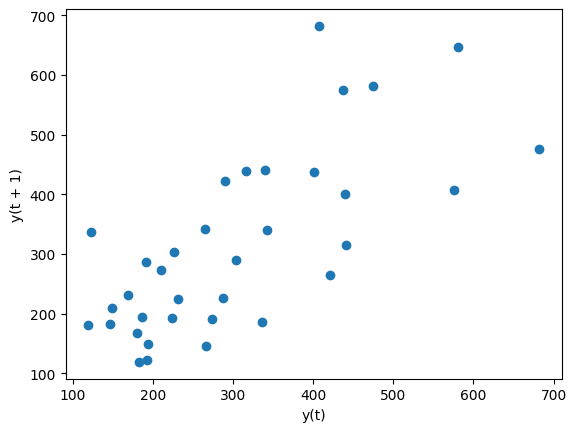

In [ ]:
#Autocorrelation Plot
pd.plotting.lag_plot(S)

In [ ]:
values=pd.DataFrame(S.values)
df=pd.concat([values.shift(1), values],axis=1)
df.columns=['t','t+1']
res=df.corr()
print(res)

            t       t+1
t    1.000000  0.719482
t+1  0.719482  1.000000


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

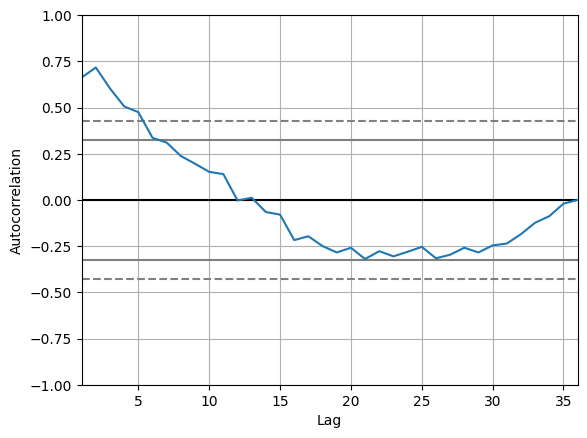

In [ ]:
pd.plotting.autocorrelation_plot(S) #AR parameter with Lag=5 is prominant

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

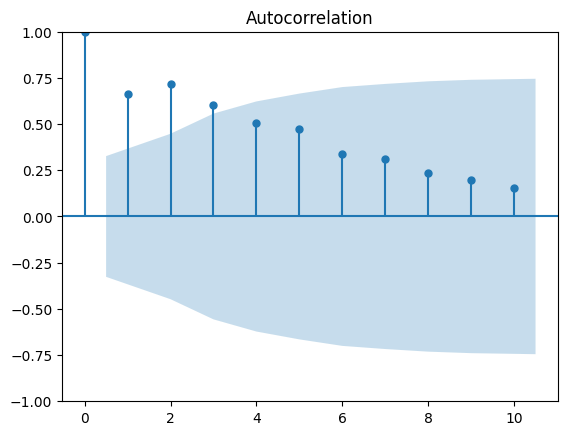

In [ ]:
plot_acf(S,lags=10)
plt.show()

Fitting an ARIMA Model

In [ ]:
#from statsmodels.tsa.arima_model import ARIMA
#import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#fit-model
model=ARIMA(S,order=(5,1,0))
model_fit=model.fit()

In [ ]:
S.tail()

Month
1903-08    407.6
1903-09    682.0
1903-10    475.3
1903-11    581.3
1903-12    646.9
Freq: M, Name: Sales, dtype: float64

In [ ]:
X=S.values
test=X[len(X)-5:len(X)]
predictions=list()
test

array([407.6, 682. , 475.3, 581.3, 646.9])

In [ ]:
#validation
output=model_fit.forecast()
output[0]

561.1137383249117

Evaluation of ARIMA model using a Walk-Forward Validation

In [ ]:
from sklearn.metrics import mean_squared_error

# split into train and test sets
X = S.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
train

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5])

In [ ]:
test

array([342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6,
       682. , 475.3, 581.3, 646.9])

In [ ]:
history = [x for x in train]
history

[266.0,
 145.9,
 183.1,
 119.3,
 180.3,
 168.5,
 231.8,
 224.5,
 192.8,
 122.9,
 336.5,
 185.9,
 194.3,
 149.5,
 210.1,
 273.3,
 191.4,
 287.0,
 226.0,
 303.6,
 289.9,
 421.6,
 264.5]

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


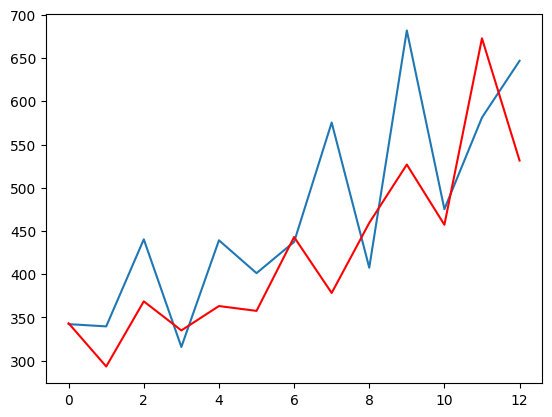

In [ ]:
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

<Axes: >

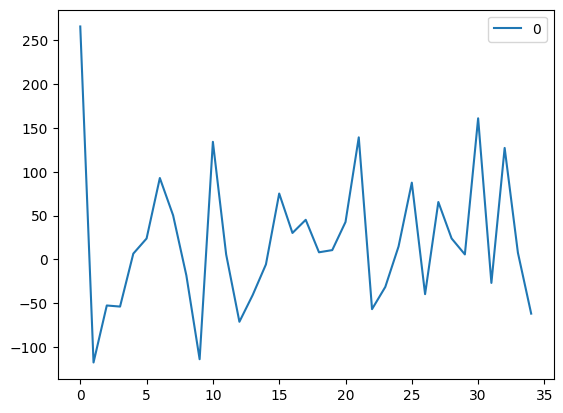

In [ ]:
#Line plot of residuals
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()

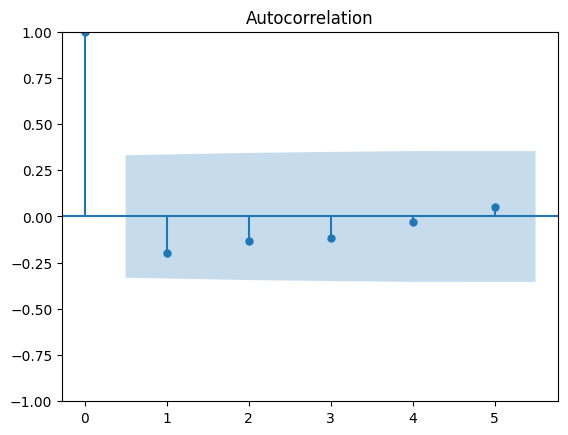

In [ ]:
plot_acf(model_fit.resid,lags=5)
plt.show()

<Axes: ylabel='Density'>

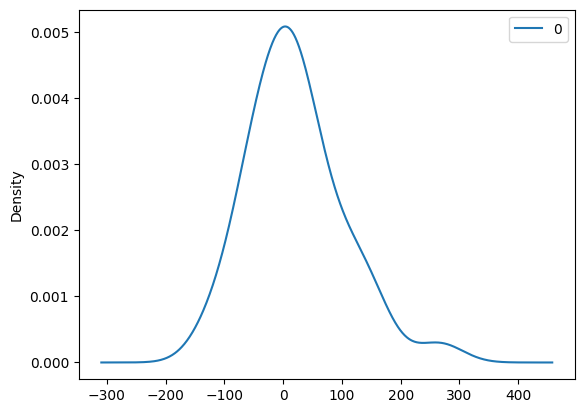

In [ ]:
#Density plot of residuals
residuals.plot(kind='kde')


In [ ]:
len(residuals)

35

In [ ]:
residuals[20:30].describe()

,0
count,10.000000
mean,21.933129
std,69.730971
min,-60.337494
25%,-33.209896
50%,5.805566
75%,62.775614
max,133.237923


The results show that indeed there is a
bias in the prediction (a non-zero mean in the residuals).

Tuning the Hyperparameter of ARIMA model

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = np.sqrt(mean_squared_error(test, predictions))
	return rmse

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# evaluate parameters
p_values = np.arange(1,10)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(S.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=228.966
ARIMA(0, 0, 1) RMSE=195.596
ARIMA(0, 0, 2) RMSE=154.886
ARIMA(0, 1, 0) RMSE=133.156
ARIMA(0, 1, 1) RMSE=104.077
ARIMA(0, 1, 2) RMSE=68.345
ARIMA(0, 2, 0) RMSE=255.187
ARIMA(0, 2, 1) RMSE=134.168
ARIMA(0, 2, 2) RMSE=74.644
ARIMA(1, 0, 0) RMSE=152.028
ARIMA(1, 0, 1) RMSE=111.787
ARIMA(1, 0, 2) RMSE=77.092
ARIMA(1, 1, 0) RMSE=88.631
ARIMA(1, 1, 1) RMSE=87.942
ARIMA(1, 1, 2) RMSE=90.986
ARIMA(1, 2, 0) RMSE=134.576
ARIMA(1, 2, 1) RMSE=86.157
ARIMA(1, 2, 2) RMSE=65.511
ARIMA(2, 0, 0) RMSE=100.879
ARIMA(2, 0, 1) RMSE=98.953
ARIMA(2, 0, 2) RMSE=98.690
ARIMA(2, 1, 0) RMSE=85.063
ARIMA(2, 1, 1) RMSE=88.428
ARIMA(2, 1, 2) RMSE=83.496
ARIMA(2, 2, 0) RMSE=97.829
ARIMA(2, 2, 1) RMSE=76.846
ARIMA(2, 2, 2) RMSE=80.808
ARIMA(4, 0, 0) RMSE=100.974
ARIMA(4, 0, 1) RMSE=101.468
ARIMA(4, 0, 2) RMSE=96.950
ARIMA(4, 1, 0) RMSE=95.068
ARIMA(4, 1, 1) RMSE=84.820
ARIMA(4, 1, 2) RMSE=84.205
ARIMA(4, 2, 0) RMSE=85.397
ARIMA(4, 2, 1) RMSE=74.219
ARIMA(4, 2, 2) RMSE=70.142
ARIMA(6, 0, 0) 

Shampoo sales records showing strong evidence of 1-lag features, having second order raising trend, with error lag of q=2 correction is done for AR 